In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the housing dataset

url = '/Users/ayushyapare/Desktop/Ayushyas_Life/Work/Projects/Final_Project/Housing_Price_Prediction_Madrid/data/processed/scraped_data_cleaned_Emanuela_22Jul24.csv'
df_ad_housing = pd.read_csv(url)
df_ad_housing.head()


,price,house_type,house_type_2,rooms,m2,elevator,garage,neighbourhood,district
0,209995,Piso,interior,2,50.0,1,0,Las Acacias,Arganzuela
1,209995,Piso,interior,2,50.0,1,0,Embajadores,Centro
2,180000,Piso,exterior,1,50.0,1,1,Villaverde Alto,Villaverde
3,290000,Piso,interior,1,50.0,1,0,Universidad,Centro
4,176000,Piso,exterior,1,50.0,1,1,Rejas,San Blas-Canillejas


In [3]:
df_ad_housing.loc[1]

price                 209995
house_type              Piso
house_type_2        interior
rooms                      2
m2                      50.0
elevator                   1
garage                     0
neighbourhood    Embajadores
district              Centro
Name: 1, dtype: object

In [4]:
#df_ad_housing.drop_duplicates(inplace=True)

In [5]:
#df_ad_housing.dropna(inplace=True)

In [6]:
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_ad_housing['neighbourhood'] = df_ad_housing['neighbourhood'].str.lower()
df_ad_housing['neighbourhood'] = df_ad_housing['neighbourhood'].apply(remove_digits)
df_ad_housing['neighbourhood'] = df_ad_housing['neighbourhood'].apply(remove_accents)




In [7]:
import unicodedata
import re

# Function to remove digits
def remove_digits(name):
    # Remove digits
    name = re.sub(r'\d+', '', name)
    # Remove hyphens
    name = re.sub(r'-', ' ', name)
    # Strip leading and trailing whitespaces
    name = name.strip()
    return name

# Function to remove accents
def remove_accents(name):
    nfkd_form = unicodedata.normalize('NFKD', name)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

# Apply the functions
df_ad_housing['district'] = df_ad_housing['district'].str.lower()
df_ad_housing['district'] = df_ad_housing['district'].apply(remove_digits)
df_ad_housing['district'] = df_ad_housing['district'].apply(remove_accents)




In [8]:

df_small_house = df_ad_housing[(df_ad_housing['m2'] > 0) &
                        (df_ad_housing['m2'] <= 80) &
                        (df_ad_housing['price'] > 0) &
                        (df_ad_housing['price'] <= 800000)
                        ]

# Create df_cl_2 to include all rows not in df_cl_1
df_large_house = df_ad_housing[(df_ad_housing['m2'] > 80) &
                        (df_ad_housing['m2'] < 180) &
                        (df_ad_housing['price'] > 800000) &
                        (df_ad_housing['price'] < 1800000)
                        ]



#### Basic Analysis

In [9]:
districts_small = df_small_house['district'].value_counts()[df_small_house['district'].value_counts() > 0].index
districts_large = df_large_house['district'].value_counts()[df_large_house['district'].value_counts() > 0].index


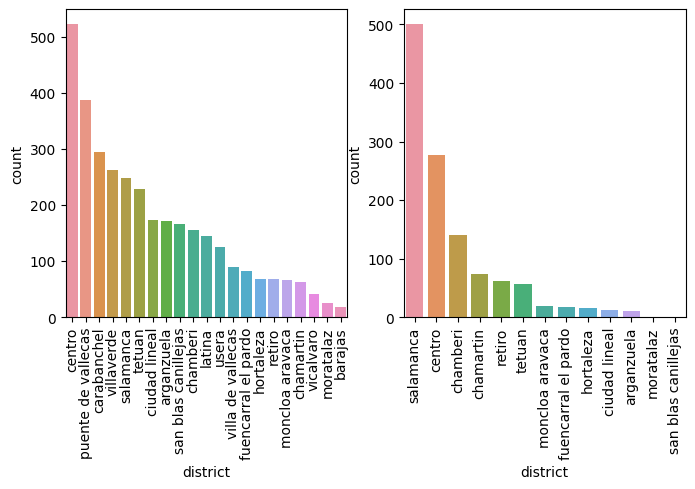

In [10]:
# Apply all filters correctly
df_small_house = df_small_house[(df_small_house['district'].isin(districts_small))]

fig,axes = plt.subplots(1,2,figsize=(8,4))
sns.countplot(
    x='district',
    data=df_small_house,
    ax=axes[0],
    order=df_small_house['district'].value_counts().index)
axes[0].tick_params(axis='x', rotation=90)

df_large_house = df_large_house[(df_large_house['district'].isin(districts_large))]

sns.countplot(
    x='district',
    data=df_large_house,
    ax=axes[1],
    order=df_large_house['district'].value_counts().index)
axes[1].tick_params(axis='x', rotation=90)
plt.show()

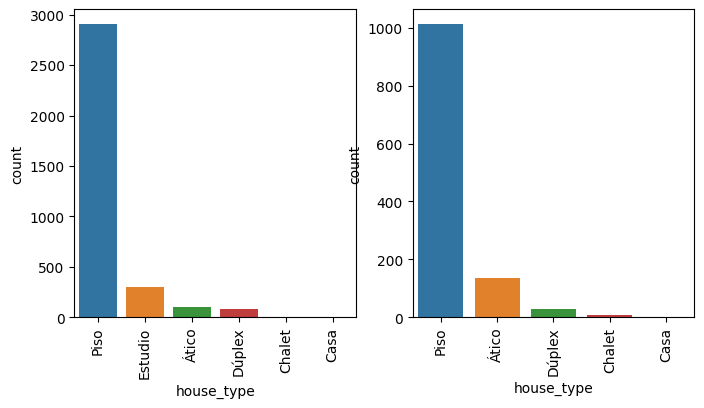

In [11]:
fig,axes = plt.subplots(1,2,figsize=(8,4))
sns.countplot(
    x='house_type',
    data=df_small_house,
    ax=axes[0],
    order=df_small_house['house_type'].value_counts().index)
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(
    x='house_type',
    data=df_large_house,
    ax=axes[1],
    order=df_large_house['house_type'].value_counts().index)
axes[1].tick_params(axis='x', rotation=90)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


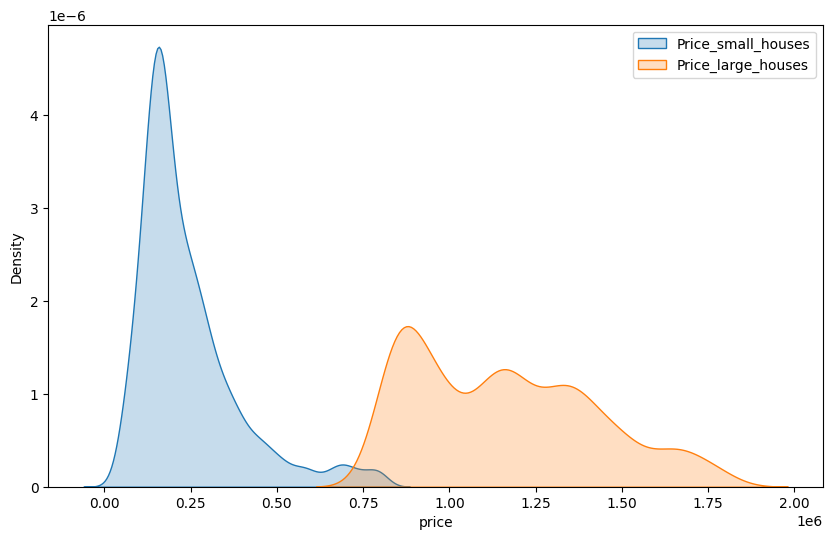

In [12]:
# Create the plot
plt.figure(figsize=(10, 6))

# KDE plot for the raw 'price' data
sns.kdeplot(df_small_house['price'], label='Price_small_houses', fill=True)

# KDE plot for the log-transformed 'price' data
sns.kdeplot(df_large_house['price'], label='Price_large_houses', fill=True)
plt.legend()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


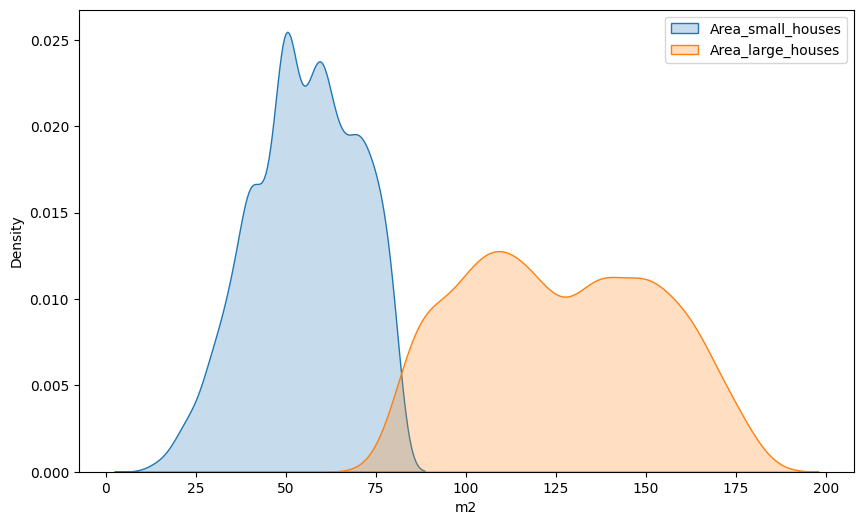

In [13]:
# Create the plot
plt.figure(figsize=(10, 6))

# KDE plot for the raw 'price' data
sns.kdeplot(df_small_house['m2'], label='Area_small_houses', fill=True)

# KDE plot for the log-transformed 'price' data
sns.kdeplot(df_large_house['m2'], label='Area_large_houses', fill=True)
plt.legend()


In [14]:
df_small_house

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighbourhood,district
0,209995,Piso,interior,2,50.0,1,0,las acacias,arganzuela
1,209995,Piso,interior,2,50.0,1,0,embajadores,centro
2,180000,Piso,exterior,1,50.0,1,1,villaverde alto,villaverde
3,290000,Piso,interior,1,50.0,1,0,universidad,centro
4,176000,Piso,exterior,1,50.0,1,1,rejas,san blas canillejas
...,...,...,...,...,...,...,...,...,...
8475,95200,Piso,interior,3,73.0,1,0,numancia,puente de vallecas
8476,83700,Piso,interior,2,64.0,1,0,comillas,carabanchel
8477,85611,Piso,exterior,3,65.0,1,0,villaverde alto,villaverde
8478,86300,Piso,interior,3,65.0,1,0,villaverde alto,villaverde


In [16]:
#df_small_house, df_small_house_unseen = train

In [17]:
from pycaret.regression import *
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_small_house,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    polynomial_features = True, 
    polynomial_degree = 1,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_method = 'kernel',
    #pca_components=6,
    log_data=False,
    log_experiment=False
    )

best_models_small_house= compare_models(n_select=3,sort='MAPE')

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(3405, 9)"
4,Transformed data shape,"(3405, 34)"
5,Transformed train set shape,"(2383, 34)"
6,Transformed test set shape,"(1022, 34)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,46604.2872,5114559891.1536,71234.1728,0.7681,0.2852,0.2245,0.0830
lightgbm,Light Gradient Boosting Machine,47302.9294,4874153295.9060,69644.8820,0.7776,0.2775,0.2264,0.2900
xgboost,Extreme Gradient Boosting,47725.0896,5374729833.6856,73176.7471,0.7545,0.2876,0.2279,0.0330
et,Extra Trees Regressor,47702.9978,5594086596.7442,74488.8715,0.7463,0.2994,0.2294,0.0740
gbr,Gradient Boosting Regressor,49216.1590,5131883817.3754,71470.3609,0.7661,0.2854,0.2354,0.0460
knn,K Neighbors Regressor,54724.6985,6559360070.6644,80664.0350,0.7031,0.3090,0.2565,0.0260
par,Passive Aggressive Regressor,59487.6051,7789613378.8539,88068.1781,0.6456,0.3397,0.2676,0.0450
huber,Huber Regressor,59450.0803,7575787331.8946,86859.3720,0.6551,0.3507,0.2727,0.0220
dt,Decision Tree Regressor,57925.1210,8480115837.5642,91824.5815,0.6105,0.3673,0.2730,0.0220
en,Elastic Net,62492.9925,8269647106.9048,90695.6850,0.6251,0.3378,0.2983,0.0220


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [18]:
best_model_small_house = stack_models(best_models_small_house, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44834.8112,4292242305.9231,65515.2067,0.8105,0.2751,0.2241
1,48048.8279,4771024655.0322,69072.6042,0.8084,0.2860,0.2265
2,49600.9539,5682209023.7453,75380.4287,0.8003,0.2848,0.2321
3,46249.8210,4529499125.5025,67301.5537,0.7744,0.2624,0.2222
4,53379.8798,6553501123.0359,80953.6974,0.7248,0.3223,0.2612
5,44944.1161,4372419829.5770,66124.2756,0.7685,0.2553,0.2031
6,44755.7979,4897087207.7312,69979.1912,0.7850,0.2717,0.2074
7,45279.0974,4726941840.5301,68752.7588,0.7842,0.2753,0.2209
8,43604.2492,4475316626.7532,66897.8073,0.7880,0.2574,0.2106


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [19]:
rf = create_model('rf', fold = 3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50657.5074,5798065547.2298,76145.0297,0.7676,0.2964,0.2384
1,48248.1092,5694918247.9985,75464.6821,0.7403,0.2847,0.2192
2,45305.4192,4727877421.7081,68759.5624,0.7585,0.2778,0.2259
Mean,48070.3452,5406953738.9788,73456.4247,0.7555,0.2863,0.2278
Std,2188.5935,482022354.1449,3332.7771,0.0113,0.0077,0.0080


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
# define tuning grid
rf_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
best_model_small_house = tune_model(rf, custom_grid = rf_grid, optimize = 'MAPE',fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,50657.5074,5798065547.2298,76145.0297,0.7676,0.2964,0.2384
1,48248.1092,5694918247.9985,75464.6821,0.7403,0.2847,0.2192
2,45305.4192,4727877421.7081,68759.5624,0.7585,0.2778,0.2259
Mean,48070.3452,5406953738.9788,73456.4247,0.7555,0.2863,0.2278
Std,2188.5935,482022354.1449,3332.7771,0.0113,0.0077,0.0080


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [21]:
holdout_pred_small_house = predict_model(best_model_small_house)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,43980.0654,4303507390.9755,65601.1234,0.7888,0.2805,0.2213


In [ ]:
save_model(holdout_pred_small_house, 'final_model')

In [22]:
holdout_pred_small_house['difference'] = abs(holdout_pred_small_house['price'] - holdout_pred_small_house['prediction_label'])
holdout_pred_small_house[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,1022.000000,1022.000000,1022.000000
mean,239730.981409,240714.236334,43980.065417
std,142818.726780,128798.196682,48698.888766
min,26100.000000,55238.295000,0.000000
25%,149000.000000,148074.288929,10947.452381
50%,195000.000000,199301.560556,29191.543333
75%,295000.000000,300682.600000,57519.375000
max,799000.000000,799000.000000,350660.000000


In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
MAE = mean_absolute_error(holdout_pred_small_house['price'], holdout_pred_small_house['prediction_label'])
RMSE = np.sqrt(mean_squared_error(holdout_pred_small_house['price'], holdout_pred_small_house['prediction_label']))
R2 = explained_variance_score(holdout_pred_small_house['price'], holdout_pred_small_house['prediction_label'])
NRMSE = RMSE/(max(holdout_pred_small_house['price']) - min(holdout_pred_small_house['price']))
print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('R2: ', R2)
print('NRMSE: ', NRMSE)


MAE:  43980.06541651306
RMSE:  65601.12339720615
R2:  0.7888554787766223
NRMSE:  0.08487659903895219


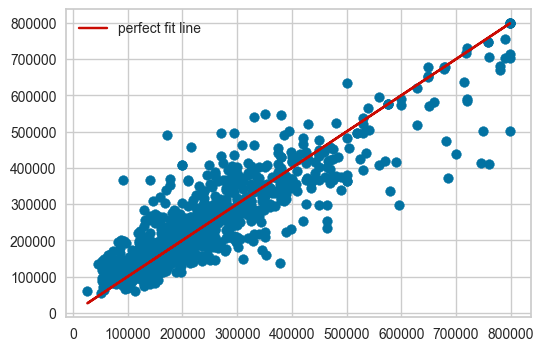

In [24]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred_small_house['price'], holdout_pred_small_house['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred_small_house['price'], holdout_pred_small_house['price'], color='r', label='perfect fit line')
plt.legend()

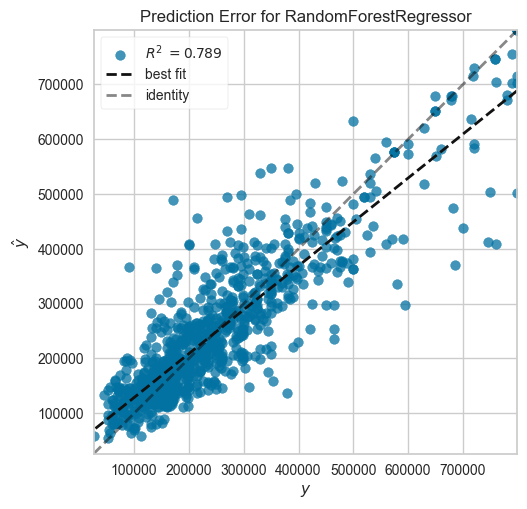

In [25]:
plot_model(best_model_small_house,plot='error')

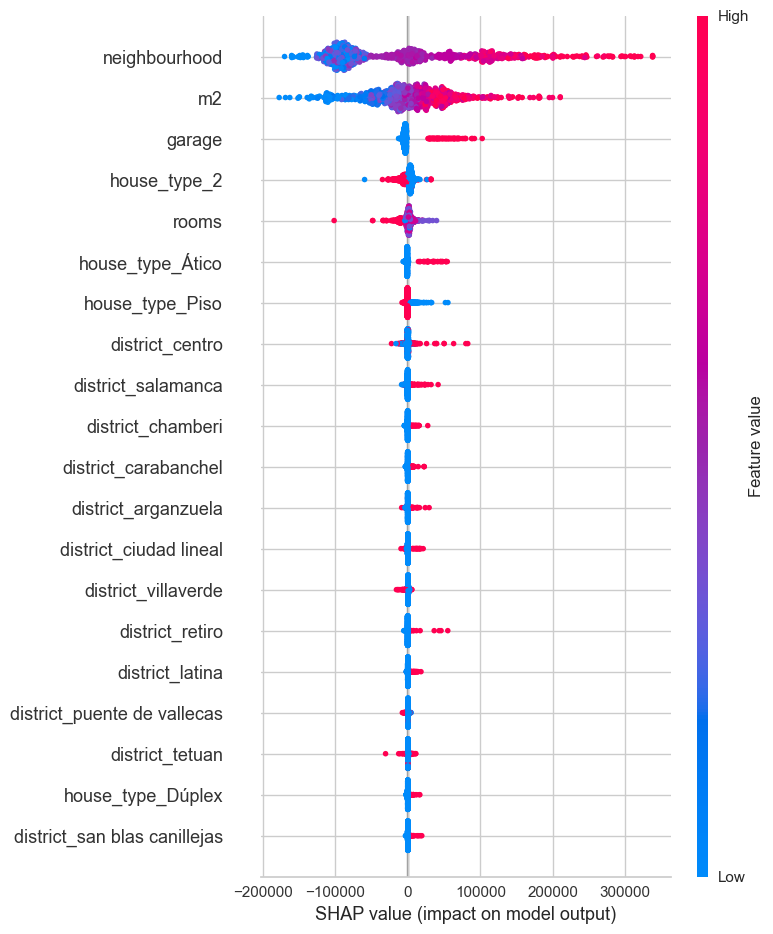

In [26]:
interpret_model(best_model_small_house, plot = 'summary')

In [27]:
interpret_model(rf, plot = 'reason', observation = 3)

##########################################################################

In [ ]:
from pycaret.regression import *
# Setup the environment in PyCaret
regression_setup = setup(
    data=df_large_house,
    #test_data=test_data,
    target = 'price',
    session_id=9,
    
    polynomial_features = True, 
    polynomial_degree = 2,
    ignore_features=[],
    numeric_imputation = 'mean',
    categorical_imputation = 'mode',
    remove_multicollinearity=True,
    multicollinearity_threshold = 0.9,
    transformation= True,
    transformation_method = 'yeo-johnson',
    normalize = True,
    normalize_method = 'zscore',
    #pca=True,
    #pca_components='mle',
    log_data=False,
    log_experiment=False
    )

best_models_large_house = compare_models(n_select=3)

,Description,Value
0,Session id,9
1,Target,price
2,Target type,Regression
3,Original data shape,"(1189, 9)"
4,Transformed data shape,"(1189, 204)"
5,Transformed train set shape,"(832, 204)"
6,Transformed test set shape,"(357, 204)"
7,Numeric features,4
8,Categorical features,4
9,Preprocess,True


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,111696.0259,30018496466.9790,172770.1609,0.5490,0.1474,0.0984,0.1110
et,Extra Trees Regressor,105602.8629,30349297989.9400,173806.9729,0.5452,0.1479,0.0929,0.1080
gbr,Gradient Boosting Regressor,127864.0210,31549744473.1343,177198.3024,0.5266,0.1514,0.1137,0.0860
lightgbm,Light Gradient Boosting Machine,119435.5743,32270406013.7347,178812.0301,0.5148,0.1527,0.1059,0.2990
xgboost,Extreme Gradient Boosting,113608.2344,33110099800.9364,181668.2181,0.5003,0.1553,0.1009,0.0980
ada,AdaBoost Regressor,156691.7196,37550126415.8103,193441.7820,0.4378,0.1693,0.1438,0.0700
knn,K Neighbors Regressor,134716.8802,37284788123.3878,192946.1632,0.4357,0.1641,0.1189,0.0570
en,Elastic Net,155575.6386,39243596276.2834,197657.8124,0.4137,0.1691,0.1387,0.0630
br,Bayesian Ridge,152434.6871,39148129692.5727,197468.0714,0.4123,0.1690,0.1364,0.0610
omp,Orthogonal Matching Pursuit,153149.0831,40218646899.7137,200113.7964,0.3979,0.1724,0.1372,0.0570


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

In [ ]:
best_model_large_house = stack_models(best_models_large_house, choose_better=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,114825.8267,26734910654.4652,163508.1364,0.6102,0.1389,0.0995
1,102711.0314,25700870483.6270,160314.9104,0.4637,0.1403,0.0947
2,120153.3544,27485055786.1648,165786.1749,0.6058,0.1455,0.1101
3,115873.3239,30560211762.5718,174814.7927,0.5949,0.1433,0.0959
4,113005.1715,28269482807.9565,168135.3110,0.5709,0.1474,0.1077
5,127182.3480,38267778336.2994,195621.5181,0.5183,0.1617,0.1078
6,129788.7279,32097282908.7995,179157.1458,0.5681,0.1511,0.1144
7,109302.8091,23493291860.8438,153275.2161,0.6366,0.1283,0.0925
8,110525.3841,30120293227.5426,173551.9900,0.4912,0.1467,0.0970


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
holdout_pred_large_house = predict_model(best_model_large_house)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,119514.0166,28762215859.3197,169594.2684,0.5976,0.1457,0.1064


In [ ]:
holdout_pred_large_house['difference'] = abs(holdout_pred_large_house['price'] - holdout_pred_large_house['prediction_label'])
holdout_pred_large_house[['price','prediction_label','difference']].describe()

,price,prediction_label,difference
count,3.570000e+02,3.570000e+02,357.000000
mean,1.163560e+06,1.163242e+06,119514.016561
std,2.677184e+05,2.038500e+05,120495.999824
min,8.100000e+05,8.439725e+05,888.937305
25%,9.250000e+05,1.004452e+06,29951.667256
50%,1.129000e+06,1.133234e+06,74975.192743
75%,1.359000e+06,1.301820e+06,177196.088961
max,1.790000e+06,1.726270e+06,652410.923817


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score
MAE = mean_absolute_error(holdout_pred_large_house['price'], holdout_pred_large_house['prediction_label'])
RMSE = np.sqrt(mean_squared_error(holdout_pred_large_house['price'], holdout_pred_large_house['prediction_label']))
R2 = explained_variance_score(holdout_pred_large_house['price'], holdout_pred_large_house['prediction_label'])
NRMSE = RMSE/(max(holdout_pred_large_house['price']) - min(holdout_pred_large_house['price']))
print('MAE: ', MAE)
print('RMSE: ', RMSE)
print('R2: ', R2)
print('NRMSE: ', NRMSE)


MAE:  119514.0165611682
RMSE:  169594.26835633238
R2:  0.5975770433337408
NRMSE:  0.17305537587380856


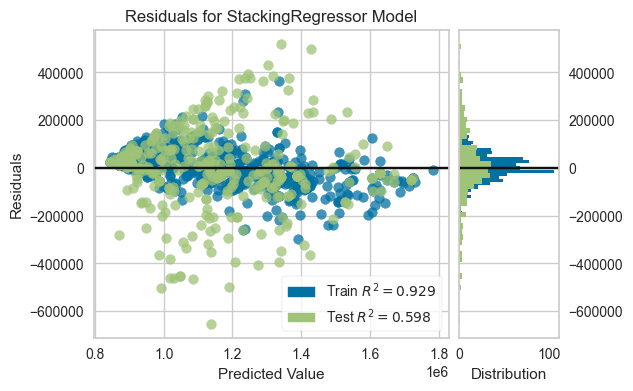

In [ ]:
plt.figure(figsize=(6,4))
plot_model(best_model_large_house,plot='residuals')
plt.show()

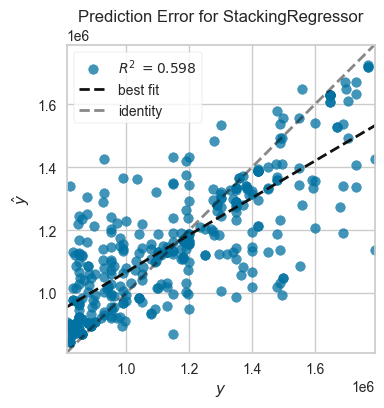

In [ ]:
plt.figure(figsize=(6,4))
plot_model(best_model_large_house,plot='error')
plt.show()

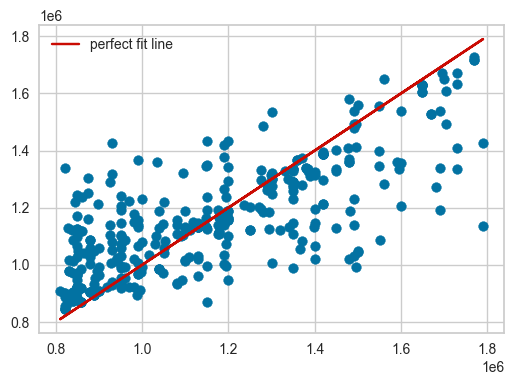

In [ ]:
plt.figure(figsize=(6,4))

# Our predictions
plt.scatter(holdout_pred_large_house['price'], holdout_pred_large_house['prediction_label']);

# Perfect predictions
plt.plot(holdout_pred_large_house['price'], holdout_pred_large_house['price'], color='r', label='perfect fit line')
plt.legend()

#######################################################
#######################################################

In [ ]:
import pandas as pd
import joblib  # Assuming the model is saved with joblib

# Example feature input from the user
user_input = {
    'price': 295000,
    'house_type': 'Piso',
    'house_type_2': 'interior',
    'rooms': 3,
    'm2': 60,
    'elevator': 0,
    'garage': 1,
    'neighbourhood': 'Prosperidad',
    'district': 'Chamartin'
}

# Convert the dictionary to a DataFrame
input_df = pd.DataFrame([user_input])



In [ ]:
input_df

,price,house_type,house_type_2,rooms,m2,elevator,garage,neighbourhood,district
0,295000,Piso,interior,3,60,0,1,Prosperidad,Chamartin
